In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pizza.csv') #read file 
df = df.fillna(0) # if the file has blanks this will filed with 0

In [3]:
df.head() # check that file is correctly imported


,Player,Pos,90s,Goals,Shots,Shots on target,% Shots on target,Shots per 90,Shots on Target by 90,Goals/Shot,G/SoT,Distance,PK,PK attempts
0,Franco Cristaldo,MF,26.7,14.0,63.0,27.0,42.9,2.36,1.01,0.10,0.22,0.0,8.0,8.0
1,Enzo Copetti,FW,23.8,11.0,49.0,22.0,44.9,2.06,0.92,0.22,0.50,0.0,0.0,1.0
2,Adam Bareiro,FW,23.4,10.0,58.0,24.0,41.4,2.47,1.02,0.12,0.29,0.0,3.0,5.0
3,Miguel Borja,FW,10.9,9.0,33.0,18.0,54.5,3.02,1.65,0.27,0.50,0.0,0.0,0.0
4,Renzo López,FW,15.1,9.0,34.0,18.0,52.9,2.25,1.19,0.26,0.50,0.0,0.0,0.0


In [4]:
df = df.loc[(df['Pos']=='FW') & (df['90s']>10)] # this is to filter by position and minimun of 90s played
df.head() #shows the beggining of our file

,Player,Pos,90s,Goals,Shots,Shots on target,% Shots on target,Shots per 90,Shots on Target by 90,Goals/Shot,G/SoT,Distance,PK,PK attempts
1,Enzo Copetti,FW,23.8,11.0,49.0,22.0,44.9,2.06,0.92,0.22,0.50,0.0,0.0,1.0
2,Adam Bareiro,FW,23.4,10.0,58.0,24.0,41.4,2.47,1.02,0.12,0.29,0.0,3.0,5.0
3,Miguel Borja,FW,10.9,9.0,33.0,18.0,54.5,3.02,1.65,0.27,0.50,0.0,0.0,0.0
4,Renzo López,FW,15.1,9.0,34.0,18.0,52.9,2.25,1.19,0.26,0.50,0.0,0.0,0.0
5,Ramón Ábila,FW,21.8,8.0,50.0,12.0,24.0,2.29,0.55,0.14,0.58,0.0,1.0,1.0


In [5]:
df = df.drop(['Pos'],axis=1).reset_index() #We reset the file eliminating the column position that is not necesary anymore
df.head()

,index,Player,90s,Goals,Shots,Shots on target,% Shots on target,Shots per 90,Shots on Target by 90,Goals/Shot,G/SoT,Distance,PK,PK attempts
0,1,Enzo Copetti,23.8,11.0,49.0,22.0,44.9,2.06,0.92,0.22,0.50,0.0,0.0,1.0
1,2,Adam Bareiro,23.4,10.0,58.0,24.0,41.4,2.47,1.02,0.12,0.29,0.0,3.0,5.0
2,3,Miguel Borja,10.9,9.0,33.0,18.0,54.5,3.02,1.65,0.27,0.50,0.0,0.0,0.0
3,4,Renzo López,15.1,9.0,34.0,18.0,52.9,2.25,1.19,0.26,0.50,0.0,0.0,0.0
4,5,Ramón Ábila,21.8,8.0,50.0,12.0,24.0,2.29,0.55,0.14,0.58,0.0,1.0,1.0


In [6]:
params = list(df.columns) #we create a list called params using the columns
params

['index',
 'Player',
 '90s',
 'Goals',
 'Shots',
 'Shots on target',
 '% Shots on target',
 'Shots per 90',
 'Shots on Target by 90',
 'Goals/Shot',
 'G/SoT',
 'Distance',
 'PK',
 'PK attempts']

In [7]:
params = params[2:] #slice the list to remove unnecesary parameter
params.remove('Distance') #remove from the list specific paramenters
params.remove('PK')
params.remove('PK attempts')
params #shows the list

['90s',
 'Goals',
 'Shots',
 'Shots on target',
 '% Shots on target',
 'Shots per 90',
 'Shots on Target by 90',
 'Goals/Shot',
 'G/SoT']

In [8]:
# The player needs to be spelled exactly the same way as it is in the data. Accents and everything.
#we select the player and create a list with the stats
player = df.loc[df['Player']=='Matías Cóccaro'].reset_index()
player = list(player.loc[0])
print(player)

[12, 21, 'Matías Cóccaro', 24.6, 5.0, 58.0, 18.0, 31.0, 2.36, 0.73, 0.05, 0.17, 0.0, 2.0, 3.0]


In [9]:
df.Player.values  

array(['Enzo Copetti', 'Adam Bareiro', 'Miguel Borja', 'Renzo López',
       'Ramón Ábila', 'Mauro Boselli', 'Leandro Benegas',
       'Martín Cauteruccio', 'Leandro Díaz', 'Luca Langoni',
       'Lisandro López', 'Darío Benedetto', 'Matías Cóccaro',
       'Ramiro Enrique', 'Augusto Lotti', 'Lucas Beltrán',
       'Cristian Colmán', 'Nicolás Fernández', 'Luciano Gondou',
       'Jonathan Herrera', 'Sebastián Lomonaco', 'Jorge Benítez',
       'Gabriel Hauche', 'Rodrigo Contreras', 'Federico Girotti'],
      dtype=object)

In [10]:
print(len(player),print(len(params)))
player = player[6:]
print(len(player),print(len(params)))

player
# we need to achieve that the two numbers are equal by slicing stats of our list

9
15 None
9
9 None


[18.0, 31.0, 2.36, 0.73, 0.05, 0.17, 0.0, 2.0, 3.0]

In [11]:
print(len(player),print(len(params)))

9
9 None


In [12]:
#values = []
#for x in range(len(params)):
#    score = stats.percentileofscore(df[params[x]],player[x])
#
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
#we this line we calculate the percentile in order to compare it with the rest of the players

In [13]:
#round(stats.percentileofscore(df[params[0]],player[0]))

In [14]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99
# this is to avoid 100 in the graph so if the player is the leader in that stat it will show 99
values

[68, 99, 0, 0, 0, 0, 0, 99, 99]

In [15]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')
# we import fonts (just for design purposes)

In [20]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ["#D70232"] * 3
text_colors = ["#000000"] * 3 + ["#F2F2F2"] * 6

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

NameError: name 'fdj_cropped' is not defined

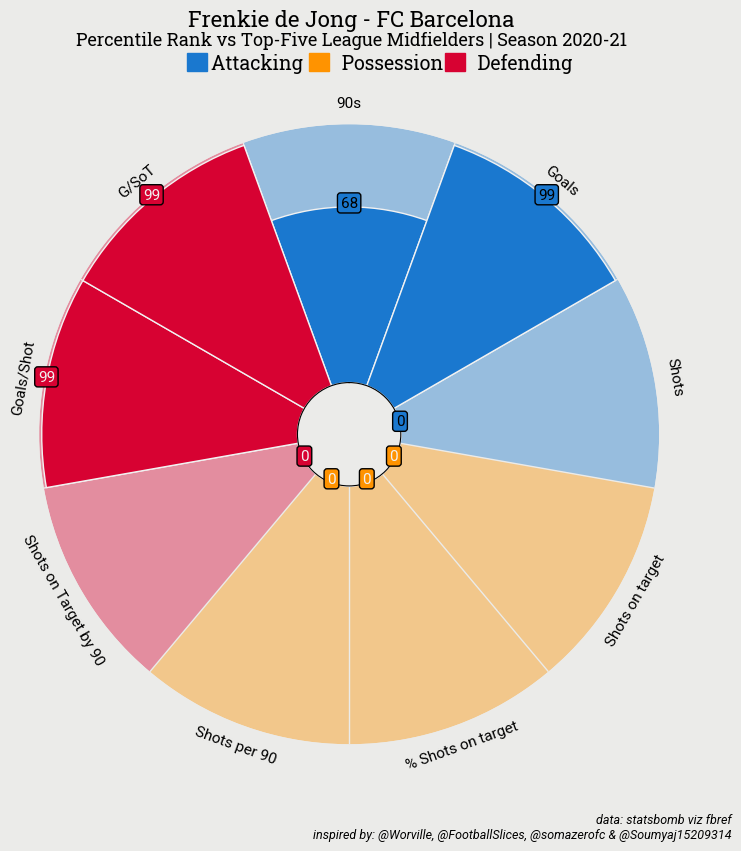

In [21]:
# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Frenkie de Jong - FC Barcelona", size=16,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()